In [6]:
import numpy as np

In [7]:
fish_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
fish_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [8]:
# Train과 Test 분리
from sklearn.model_selection import train_test_split

In [9]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_length, fish_weight, random_state=42
)

In [10]:
# 컬럼으로 쭉 내려가며 생성함 -> 2차원 배열로
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [11]:
from sklearn.neighbors import KNeighborsRegressor

In [12]:
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

---
### 길이가 50cm인 생선인 무게를 예측

In [13]:
knr.predict([[50]])

array([1033.33333333])

### 기존 데이터로 무게확인


In [14]:
train_target.max()

1100.0

In [15]:
train_input.max()

44.0

> 예측하고싶은 길이값은 50이지만 훈련용 머신러닝의 길이의 최대값은 44.0이다.

In [16]:
### 산점도로 이웃을 구해서 확인해보자


In [17]:
import matplotlib.pyplot as plt

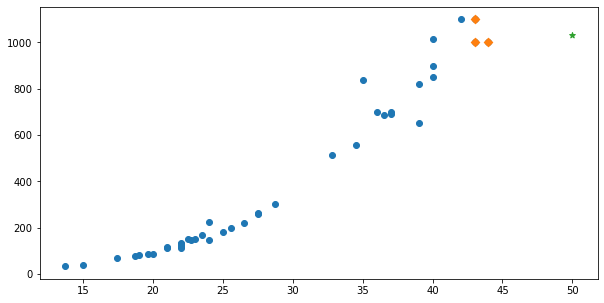

In [18]:
# 50cm 이웃을 구합니다.
distance, indexes = knr.kneighbors([[50]])

# 훈련세트의 산점도를 그립니다.
plt.figure(figsize=(10,5))
plt.scatter(train_input, train_target)

# 이웃샘플만 다시 그립니다.
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 길이가 50cm인 생선
plt.scatter(50, 1033, marker='*')

plt.show()

In [19]:
# ???
knr.predict([[100]])

array([1033.33333333])

> 이런 데이터는 knr로 예측할 수가 없다.(아예 동떨어진 수치로 이웃평균값이 틀린 값이다.)

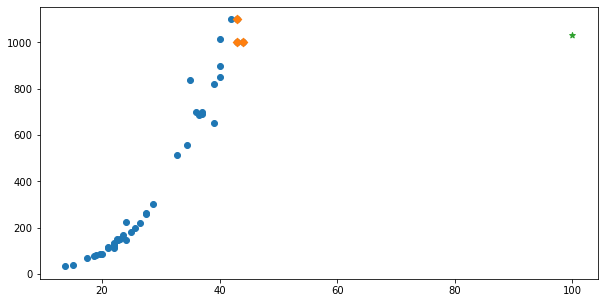

In [20]:
# 100cm 이웃을 구합니다.
distance, indexes = knr.kneighbors([[100]])

# 훈련세트의 산점도를 그립니다.
plt.figure(figsize=(10,5))
plt.scatter(train_input, train_target)

# 이웃샘플만 다시 그립니다.
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 길이가 50cm인 생선
plt.scatter(100, 1033, marker='*')

plt.show()

> 마찬가지로 틀리게 예측한다. 따라서 항상 값이 맞는지 그래프를 그려보고 판단해야된다  
> knr은 기본적으로 주변값으로 예측하기에 범위에 벗어난 값은 예측이 힘듬 -> 따라서 선형회귀를 씀!!

---
## 선형회귀(Linear Regression)
: 직선이나 곡선의 함수식(Y=aX+b)를 이용하여 구하는 방식으로 로지스틱 회귀분석이나 인공신경망의 기초가 되었다.

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr = LinearRegression()

In [23]:
# 선형회귀도 마찬가지로 fit()으로 학습시킨다.
lr.fit(train_input, train_target)

LinearRegression()

In [24]:
lr.predict([[50]])

array([1241.83860323])

In [25]:
# Y=aX+b에서 기울기와 절편을 출력 (Deep Learning에서는 Weight와 Bias로 불림)
    # 맨끝에 _(언더바)가 있는 것들은 함수가 만들어낸 변수들이다.
print(lr.coef_ , lr.intercept_)

[39.01714496] -709.0186449535477


> 다항과 다중은 다르다 (기울기 값이 리스트로 출력되었다.)

In [26]:
# array([1241.83860323]) 이 맞는지 y=ax+b라는 공식에 대입해보자
    # 50cm인 생선에 맞는 공식이지 모든 생선에 대입할수 있는 공식이 아니다.
39.01714496 * 50 + -709.0186449535477

1241.8386030464526

### 산점도 그려보기

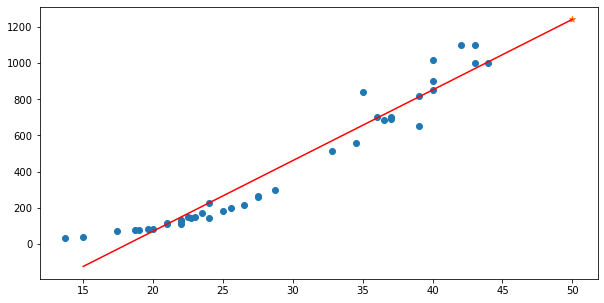

In [27]:
# 훈련세트의 산점도를 그립니다.
plt.figure(figsize=(10,5))
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프를 그립니다.
plt.plot(
    [15,50],
    [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_], c ='red'
)

# 50cm 생선 데이터 그래프로 찍어보기
plt.scatter(50,1241.8, marker='*')

plt.show()

> 산점도의 회귀선을 보니 길이가 작아지면 무게가 음수가 발생할 수 있다.  
> 절편이 음수이다.

In [28]:
# 과대 과소 보기
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


> 선형회귀는 과대적합이 발생하였다

> 다항 회귀식으로 만들어봐야겠다라는 생각이 들어야된다! -> 그래프를 보고 어떻게 해야될지를 판단이 필요함(분석가의 역량)

### 다항 회귀
Y = $aX^2$+bX+C
- 항이 여러개 있고 Feature가 하나인 것을 의미
- Feature가 여러개인 회귀는 다중회귀 라고 한다.

In [37]:
# Feature를 제곱한 Column을 생성하여 기존의 Column에 붙인다.

train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

In [38]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [39]:
lr = LinearRegression()

In [40]:
lr.fit(train_poly, train_target)

LinearRegression()

In [41]:
# 50cm 생선에 대한 예측(1241.8)
lr.predict([[50**2, 50]])

array([1573.98423528])

In [42]:
# 기울기와 절편
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


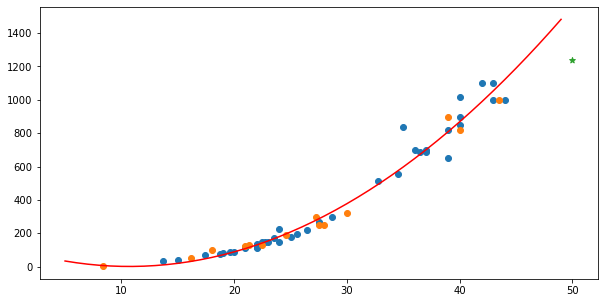

In [44]:
# 구간별 직선ㅇㄹ 그리기 위해 15에서 49까지의 정수 배열을 만듭니다.
point = np.arange(5, 50)

# 훈련세트의 산점도를 그립니다.
plt.figure(figsize=(10,5))
plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)

# 15에서 50까지 1차 방정식 그래프를 그립니다.
plt.plot(
    point, # x값은 15에서 50까지
    1.01*point**2 - 21.6*point + 116.05,
    color = 'red'
)

# 50cm 생선 데이터 그래프로 찍어보기
plt.scatter(50,1241.8, marker='*')

plt.show()

In [45]:
# 과대 적합과 과소 적합
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325121


> 약간의 과소적합이 발생하지만 단순회귀보다는 다항회귀가 진전이 있었다.